In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, f1_score, recall_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('Customer Data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7043 non-null   int64  
 1   customerID        7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


In [4]:
df.head(40)

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [5]:
df.isnull().sum()

Unnamed: 0           0
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [6]:
df.drop('customerID', axis = 1, inplace = True)

In [7]:
df.drop('Unnamed: 0', axis =1, inplace = True)

In [8]:
df.dropna(axis = 0, inplace = True)

In [9]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
df.head(20)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [12]:
# label encoding for gender, Partner, Dependents, PhoneService, MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingMovies, PaperlessBilling, churn
label_encoders = {}

for col in ['gender','Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies', 'Contract', 'PaperlessBilling', 'Churn']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print(label_encoders)
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Mapping:", label_mapping)

{'gender': LabelEncoder(), 'Partner': LabelEncoder(), 'Dependents': LabelEncoder(), 'PhoneService': LabelEncoder(), 'MultipleLines': LabelEncoder(), 'OnlineSecurity': LabelEncoder(), 'OnlineBackup': LabelEncoder(), 'DeviceProtection': LabelEncoder(), 'TechSupport': LabelEncoder(), 'StreamingTV': LabelEncoder(), 'StreamingMovies': LabelEncoder(), 'Contract': LabelEncoder(), 'PaperlessBilling': LabelEncoder(), 'Churn': LabelEncoder()}
Label Mapping: {'No': 0, 'Yes': 1}


In [13]:
df['Contract']

0       0
1       1
2       0
3       1
4       0
       ..
7038    1
7039    1
7040    0
7041    0
7042    2
Name: Contract, Length: 7032, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   int64  
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   object 
 17  

In [15]:
# one-hot encoding for the InternetService and the PaymentMethod columns
one_hot_encoders = {}

for col in ['InternetService', 'PaymentMethod']:
    one_hot = OneHotEncoder(sparse_output = False)
    transformed = one_hot.fit_transform(df[[col]])

    transformed_df = pd.DataFrame(transformed,
                                  columns = [f"{col}_{cat}" for cat in one_hot.categories_[0]],
                                 index = df.index)
    df = pd.concat([df, transformed_df], axis = 1)
    df.drop(columns = [col], inplace = True)

    one_hot_encoders[col] = one_hot

print(one_hot_encoders)

{'InternetService': OneHotEncoder(sparse_output=False), 'PaymentMethod': OneHotEncoder(sparse_output=False)}


In [16]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,0,2,0,...,29.85,29.85,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0,0,0,34,1,0,2,0,2,...,56.95,1889.50,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,0,0,0,2,1,0,2,2,0,...,53.85,108.15,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,0,0,0,45,0,1,2,0,2,...,42.30,1840.75,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0


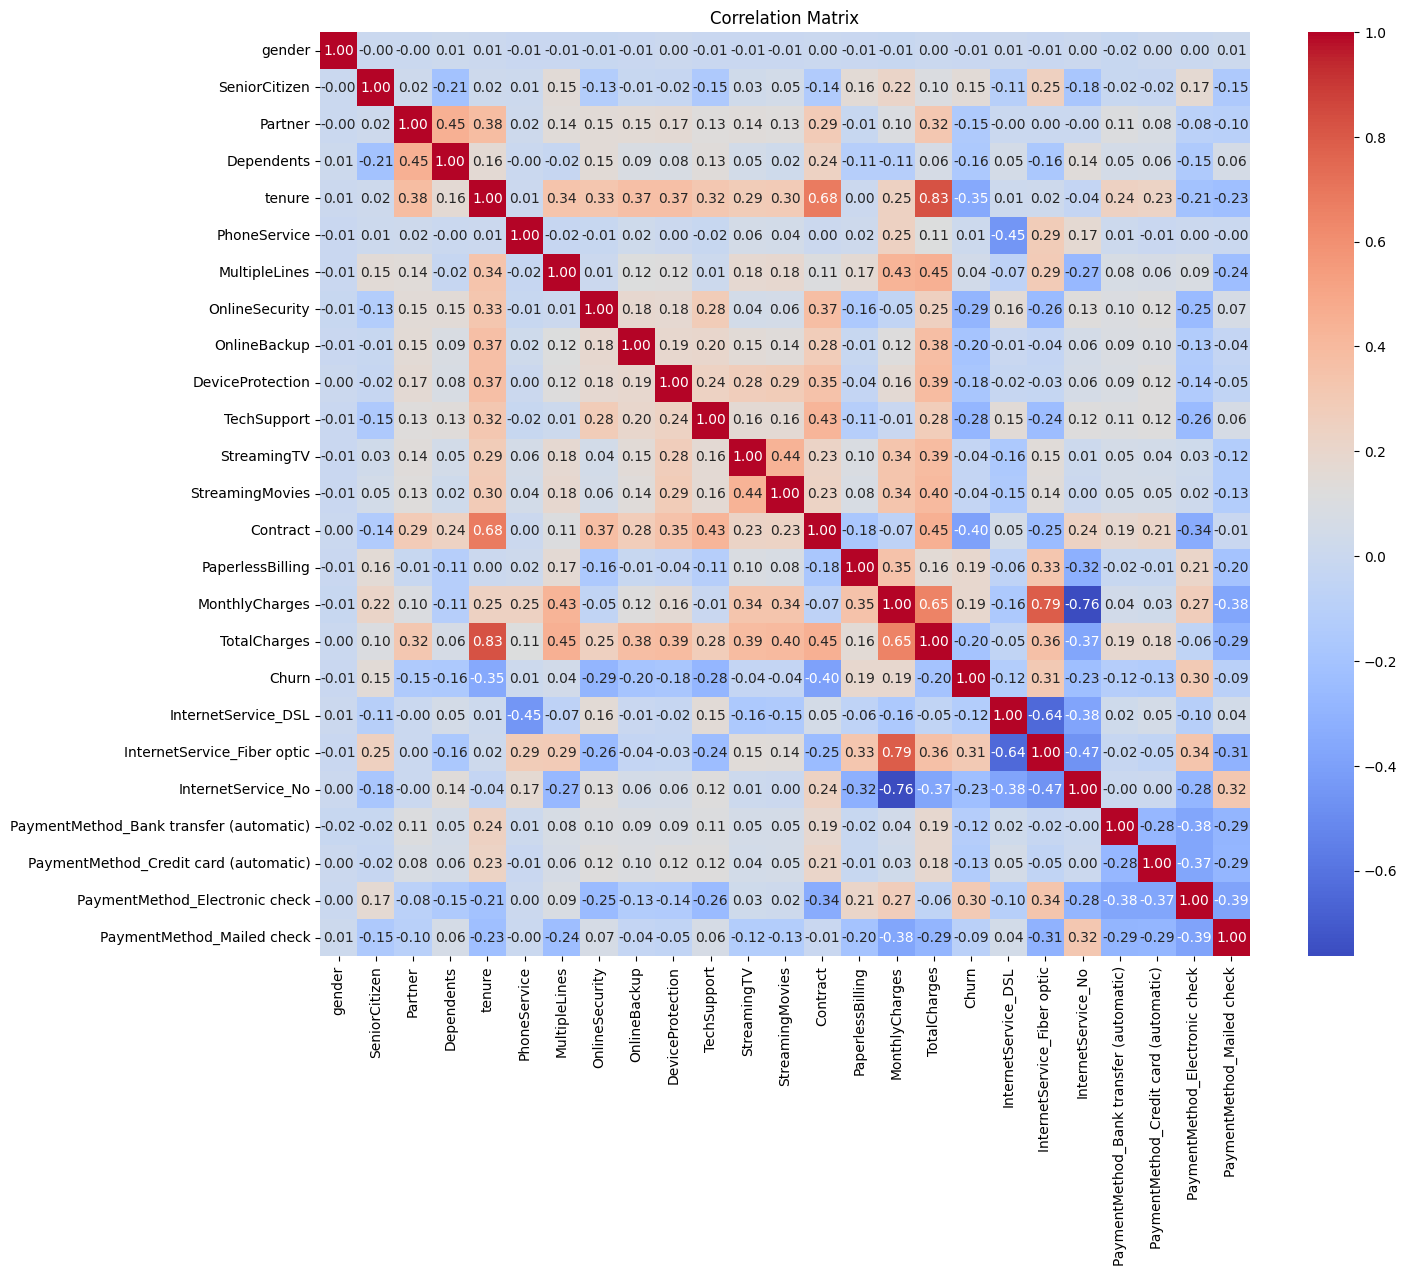

In [17]:
correlation_matrix = df.corr()
plt.figure(figsize = (15, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

## Inferences from the correlation matrix:

##### Longer the tenure, the customer is less likely to churn 
##### Monthly charges for the fibre optic is the highest 
##### There is a 45% chance that if a customer has a partner then they're also likely to have dependents 
##### Gender does is not correlated to any of the features, this column can be dropped 
##### Senior Citizen also does not seem to have any correlation, hence this column can also be dropped 

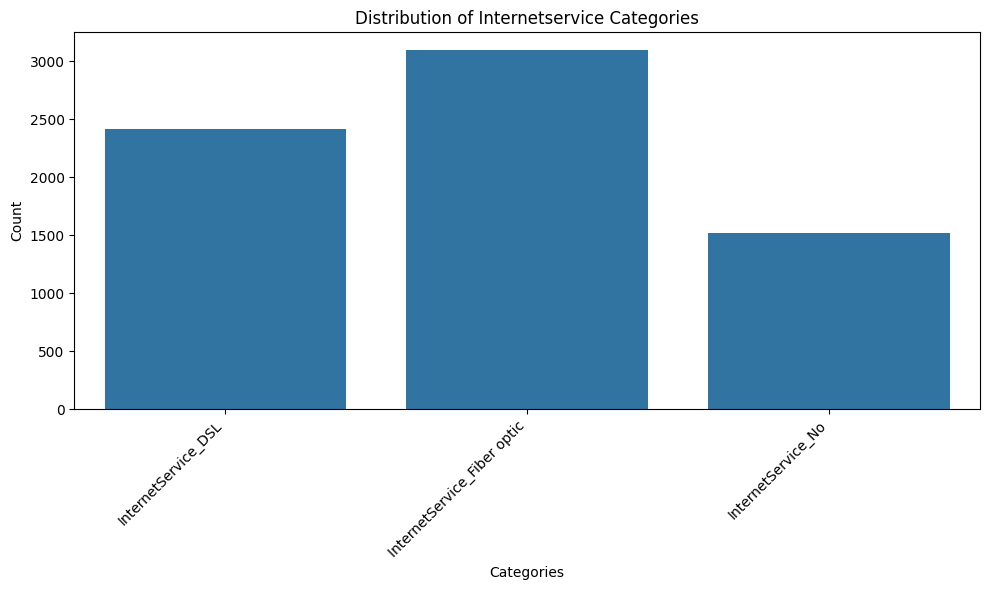

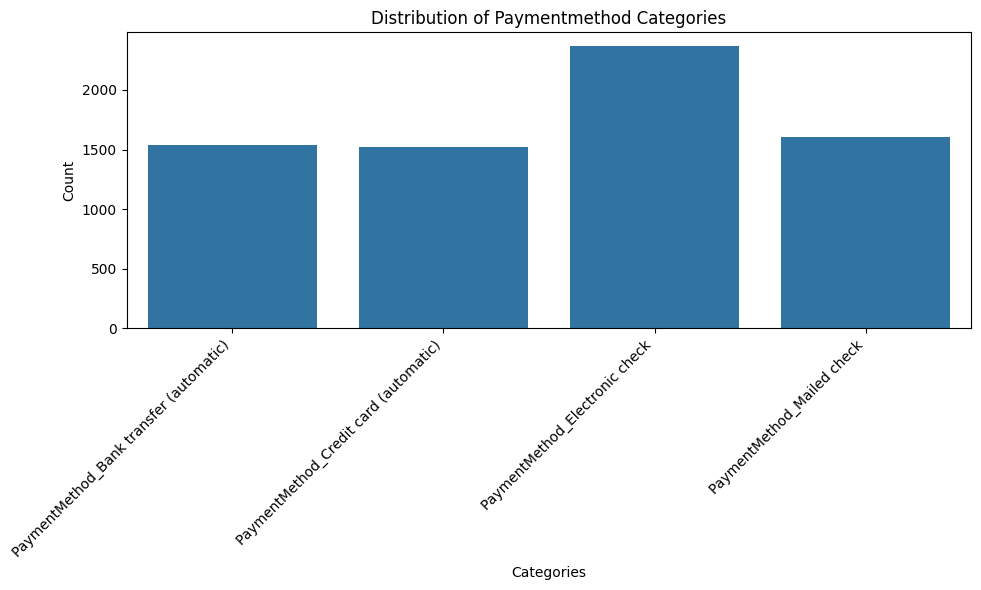

In [18]:
def plot_one_hot_encoded_stats(df, feature_prefix):
    """
    Plot the distribution of one-hot encoded columns with a common prefix.

    Parameters:
    df (DataFrame): The DataFrame containing one-hot encoded columns.
    feature_prefix (str): The prefix of the one-hot encoded columns (e.g., 'property_type_').

    Returns:
    None
    """
    # Select columns with the specified prefix
    feature_columns = [col for col in df.columns if col.startswith(feature_prefix)]

    # Calculate the sum for each one-hot encoded column
    feature_counts = df[feature_columns].sum()

    # Plot the counts
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_counts.index, y=feature_counts.values)
    plt.title(f"Distribution of {feature_prefix[:-1].replace('_', ' ').title()} Categories")
    plt.ylabel("Count")
    plt.xlabel("Categories")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

for feature_prefix in ['InternetService_', 'PaymentMethod_']:
    plot_one_hot_encoded_stats(df, feature_prefix)


### Fibre optic is the most popular internet service category with 44.03% of customers opting for fibre optic internet, DSL is second with 34.36% of customers and finally 21.62% of customers do not have internet service
### Electronic check is the most popular form of transaction with 33.63% of total customers doing electronic check transfer, second most popular is bank transfer with 21.93% adn third is mailed check with 22.81% of customers

In [42]:
fibre_optic = len(df[df['InternetService_Fiber optic'] == 1])
fibre_optic_per = (fibre_optic/total_customers)*100
DSL = len(df[df['InternetService_DSL'] == 1])
DSL_per = (DSL/total_customers)*100
no_internet_service = len(df[df['InternetService_No'] == 1])
no_internet_service_per = (no_internet_service/total_customers)*100
print(f"Number of fiber optic internet service: {fibre_optic_per:.2f}%")
print(f"Number of DSL internet service: {DSL_per:.2f}%")
print(f"Number of no internet service: {no_internet_service_per:.2f}%")

BankTransfer = len(df[df['PaymentMethod_Bank transfer (automatic)']==1])
BankTransfer_per = (BankTransfer/total_customers)*100
CreditCard = len(df[df['PaymentMethod_Credit card (automatic)']==1])
CreditCard_per = (CreditCard/total_customers)*100
ElectronicCheck = len(df[df['PaymentMethod_Electronic check']==1])
ElectronicCheck_per = (ElectronicCheck/total_customers)*100
MailedCheck = len(df[df['PaymentMethod_Mailed check']==1])
MailedCheck_per = (MailedCheck/total_customers)*100
print(f"\nPercentage of bank transfer: {BankTransfer_per:.2f}%")
print(f"Percentage of credit card: {CreditCard_per:.2f}%")
print(f"Percentage of electronic check: {ElectronicCheck_per:.2f}%")
print(f"Percentage of mailed check: {MailedCheck_per:.2f}%")

Number of fiber optic internet service: 44.03%
Number of DSL internet service: 34.36%
Number of no internet service: 21.62%

Percentage of bank transfer: 21.93%
Percentage of credit card: 21.63%
Percentage of electronic check: 33.63%
Percentage of mailed check: 22.81%


/var/folders/pt/m45tcz0n18zgj8vt3kqn08qh0000gn/T/ipykernel_72955/100590981.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="viridis")
/var/folders/pt/m45tcz0n18zgj8vt3kqn08qh0000gn/T/ipykernel_72955/100590981.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="viridis")
/var/folders/pt/m45tcz0n18zgj8vt3kqn08qh0000gn/T/ipykernel_72955/100590981.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="viridis")
/var/folders/pt/m45tcz0n18zgj8vt3kqn08qh0000gn/T/ipykernel_72955/10

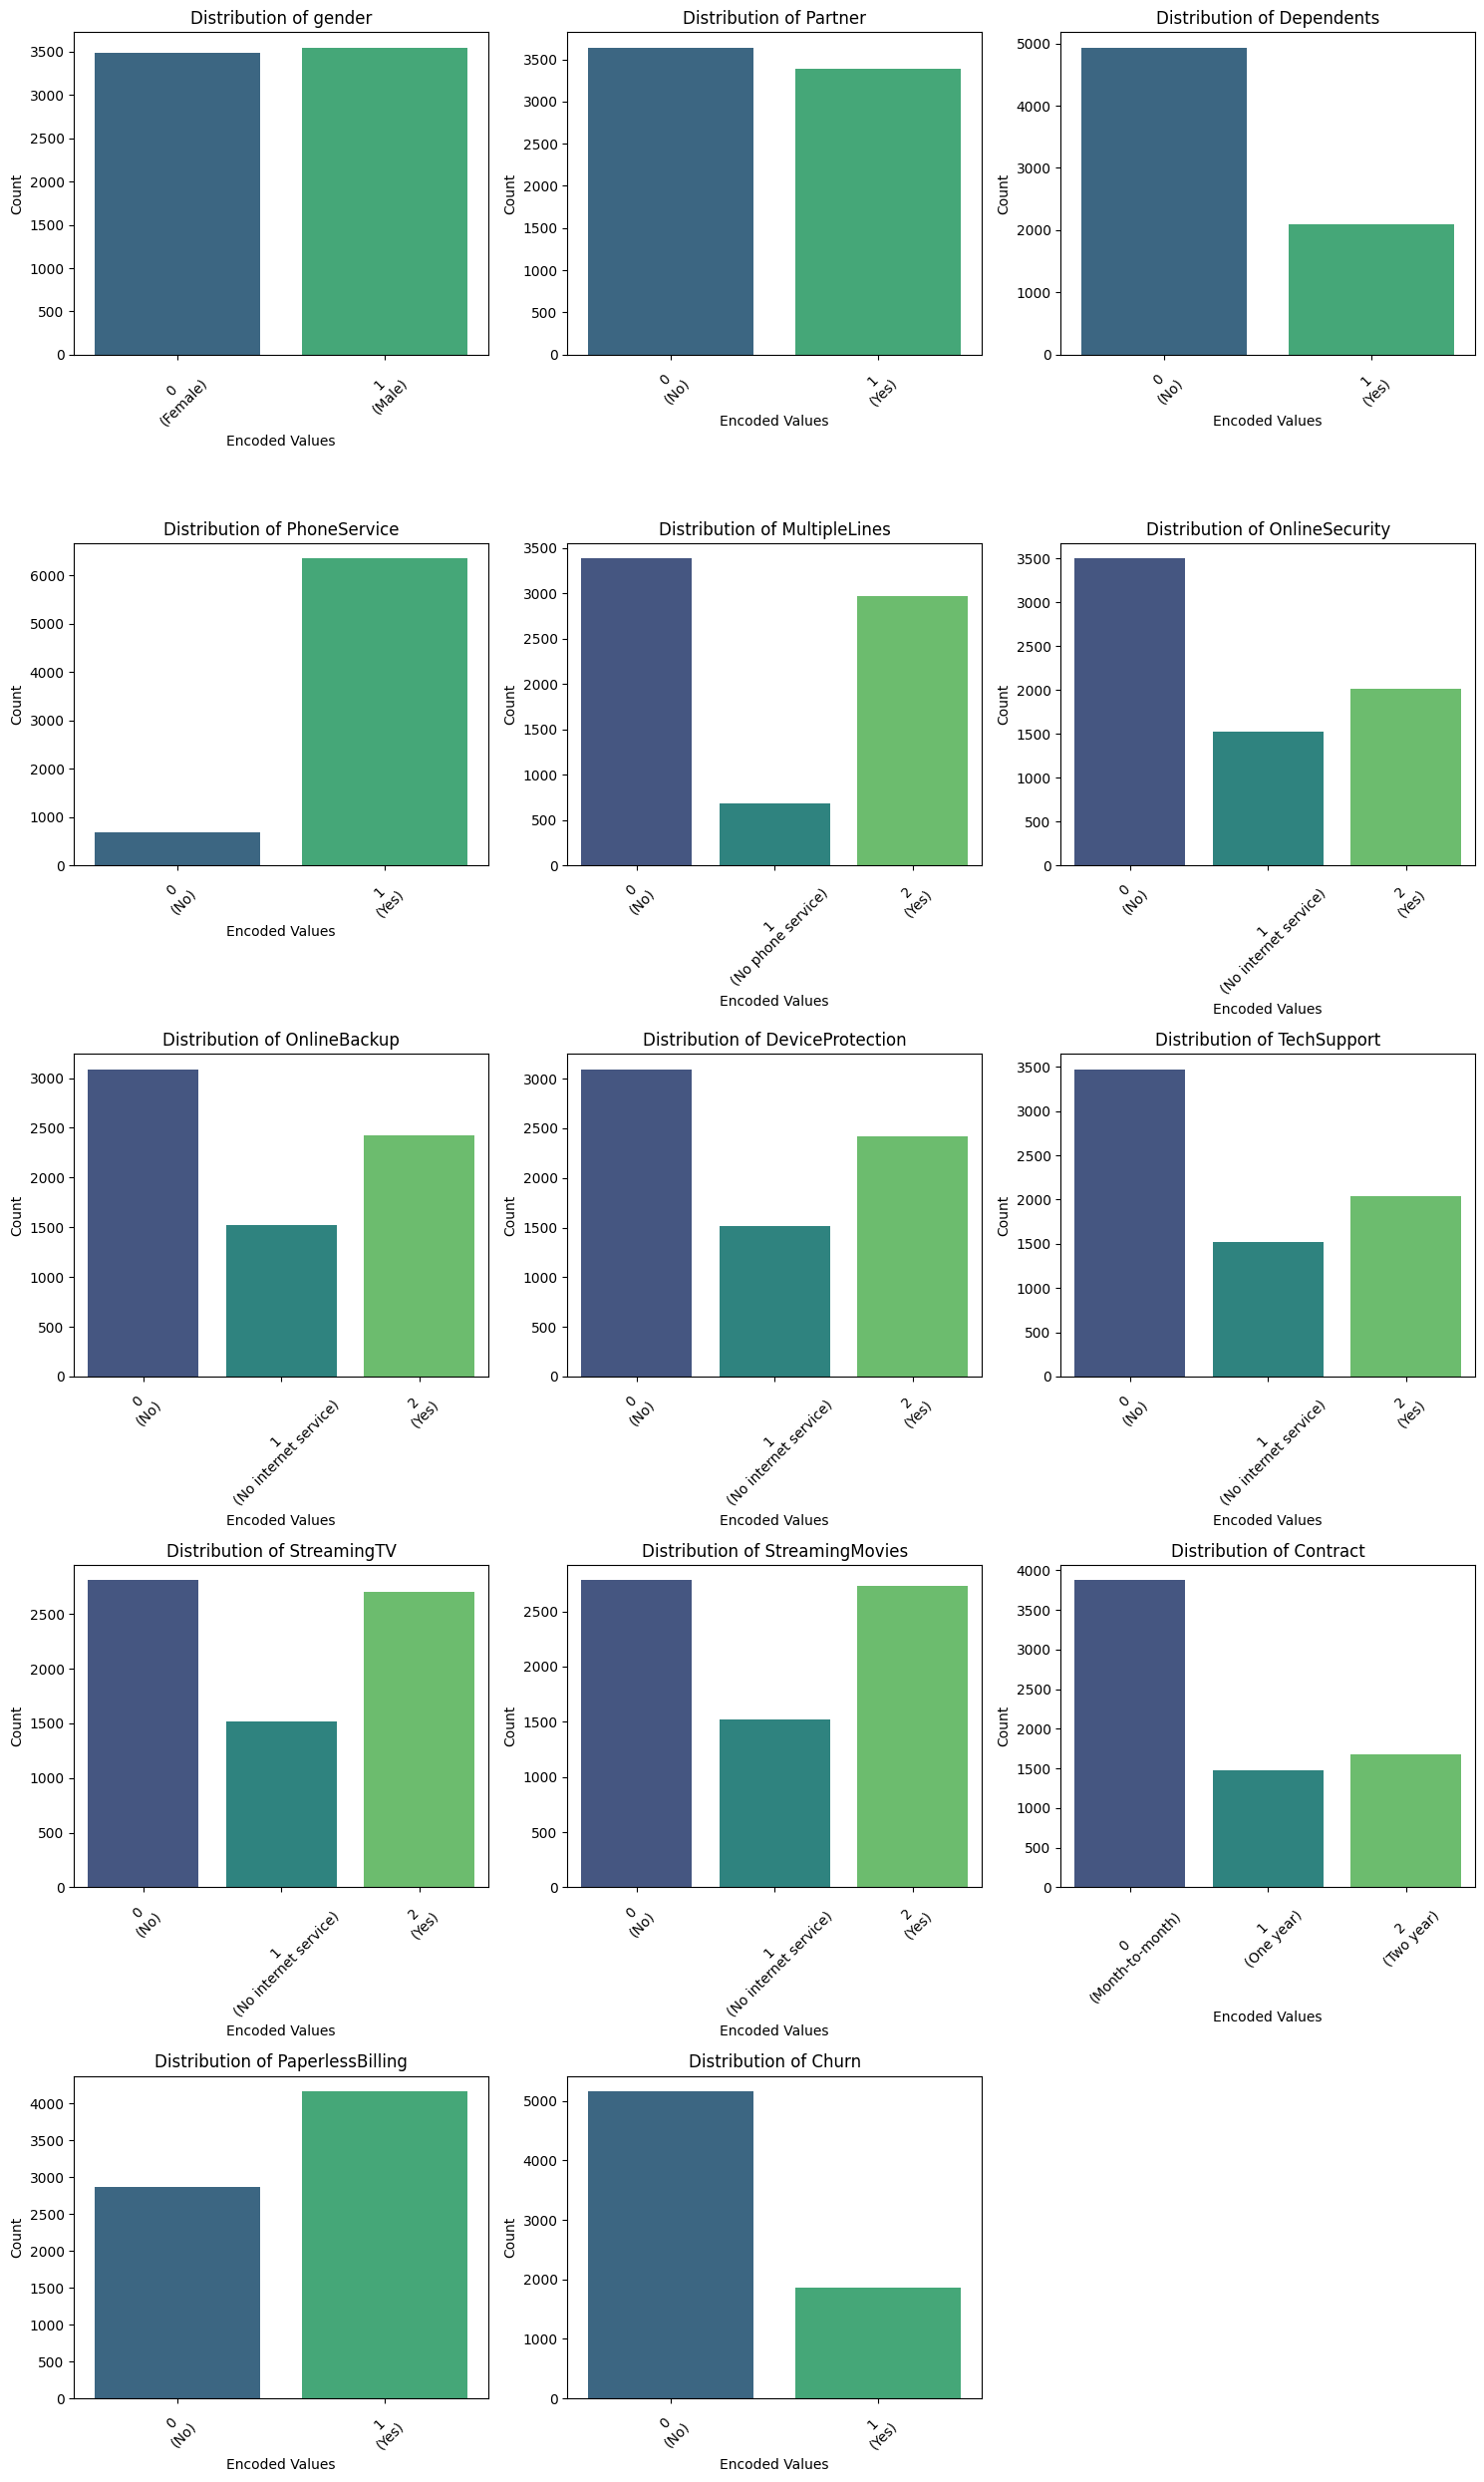

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_label_encoded_distributions(df, label_encoders):
    """
    Plot distributions of all label-encoded columns.

    Parameters:
    df (DataFrame): The DataFrame containing label-encoded columns.
    label_encoders (dict): A dictionary of LabelEncoder objects keyed by column names.

    Returns:
    None
    """
    # Number of label-encoded columns
    n_features = len(label_encoders)
    n_cols = 3  # Number of plots per row
    n_rows = (n_features + n_cols - 1) // n_cols  # Calculate number of rows needed

    # Create the figure
    plt.figure(figsize=(15, 5 * n_rows))
    
    # Iterate through label-encoded columns and their encoders
    for i, (col, encoder) in enumerate(label_encoders.items()):
        plt.subplot(n_rows, n_cols, i + 1)
        
        # Plot the distribution
        sns.countplot(x=df[col], palette="viridis")
        
        # Add labels
        plt.title(f"Distribution of {col}")
        plt.xlabel("Encoded Values")
        plt.ylabel("Count")
        
        # Display mapping as xtick labels (optional)
        xticks = [f"{val}\n({label})" for val, label in enumerate(encoder.classes_)]
        plt.xticks(ticks=range(len(encoder.classes_)), labels=xticks, rotation=45)

    plt.tight_layout()
    plt.show()

plot_label_encoded_distributions(df, label_encoders)

In [20]:
def display_label_encodings(label_encoders):
    """
    Display the original values and their respective encoded values for all label-encoded columns.

    Parameters:
    label_encoders (dict): A dictionary of LabelEncoder objects keyed by column names.

    Returns:
    None
    """
    for col, encoder in label_encoders.items():
        print(f"Encodings for column '{col}':")
        for original, encoded in zip(encoder.classes_, range(len(encoder.classes_))):
            print(f"  Value: {original} -> Encoded Value: {encoded}")
        print("\n")
display_label_encodings(label_encoders)

Encodings for column 'gender':
  Value: Female -> Encoded Value: 0
  Value: Male -> Encoded Value: 1


Encodings for column 'Partner':
  Value: No -> Encoded Value: 0
  Value: Yes -> Encoded Value: 1


Encodings for column 'Dependents':
  Value: No -> Encoded Value: 0
  Value: Yes -> Encoded Value: 1


Encodings for column 'PhoneService':
  Value: No -> Encoded Value: 0
  Value: Yes -> Encoded Value: 1


Encodings for column 'MultipleLines':
  Value: No -> Encoded Value: 0
  Value: No phone service -> Encoded Value: 1
  Value: Yes -> Encoded Value: 2


Encodings for column 'OnlineSecurity':
  Value: No -> Encoded Value: 0
  Value: No internet service -> Encoded Value: 1
  Value: Yes -> Encoded Value: 2


Encodings for column 'OnlineBackup':
  Value: No -> Encoded Value: 0
  Value: No internet service -> Encoded Value: 1
  Value: Yes -> Encoded Value: 2


Encodings for column 'DeviceProtection':
  Value: No -> Encoded Value: 0
  Value: No internet service -> Encoded Value: 1
  Value: Ye

In [21]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [28]:
total_customers = len(df)

churned = len(df[df['Churn']==1])
churned_percentage = (churned/total_customers)*100
customer_retention_rate = 100-churned_percentage
print(f"Customer retention rate: {customer_retention_rate:.2f}%")

month_to_month = len(df[df['Contract'] == 0])
one_year = len(df[df['Contract'] == 1])
two_year = len(df[df['Contract'] == 2])
month_to_month_per = (month_to_month/total_customers)*100
one_year_per = (one_year/total_customers)*100
two_year_per = (two_year/total_customers)*100
print(f"\nPercentage of month to month contracts: {month_to_month_per:.2f}%")
print(f"Percentage of one year contracts: {one_year_per:.2f}%")
print(f"Percentage of two year contracts: {two_year_per:.2f}%")

phone_service_yes = len(df[df['PhoneService']==1])
phone_service_no = len(df[df['PhoneService']==0])
phone_service_yes_percentage = (phone_service_yes/total_customers)*100
phone_service_no_percentage = (phone_service_no/total_customers)*100
print(f"\nPercentage of customers with phone service: {phone_service_yes_percentage:.2f}%")
print(f"Percentage of customers without phone service: {phone_service_no_percentage:.2f}%")

paperless_yes = len(df[df['PaperlessBilling']==1])
paperless_no = len(df[df['PaperlessBilling']==0])
paperless_yes_percentage = (paperless_yes/total_customers)*100
paperless_no_percentage = (paperless_no/total_customers)*100
print(f"\nPercentage of customers who opt for paperless billing: {paperless_yes_percentage:.2f}%")
print(f"Percentage of who don't opt for paperless billing: {paperless_no_percentage:.2f}%")

number_of_no_internet_service = 0
for col in ['StreamingMovies', 'StreamingTV', 'TechSupport', 'OnlineBackup', 'OnlineSecurity']:
    number_of_no_internet_service += len(df[df[col]==1])
number_of_no_internet_service = number_of_no_internet_service/5
no_internet_service_per = (number_of_no_internet_service/total_customers)*100
print(f"\nPercentage of customers without intenet service: {no_internet_service_per:.2f}%")

StreamingMovies_yes = len(df[df['StreamingMovies']==1])
StreamingMovies_no = len(df[df['StreamingMovies']==0])
StreamingMovies_yes_percentage = (StreamingMovies_yes/total_customers)*100
StreamingMovies_no_percentage = (StreamingMovies_no/total_customers)*100
print(f"\nPercentage of customers who stream movies: {StreamingMovies_yes_percentage:.2f}%")
print(f"Percentage of who don't stream movies: {StreamingMovies_no_percentage:.2f}%")

StreamingTV_yes = len(df[df['StreamingTV']==1])
StreamingTV_no = len(df[df['StreamingTV']==0])
StreamingTV_yes_percentage = (StreamingTV_yes/total_customers)*100
StreamingTV_no_percentage = (StreamingTV_no/total_customers)*100
print(f"\nPercentage of customers who stream TV: {StreamingTV_yes_percentage:.2f}%")
print(f"Percentage of who don't stream TV: {StreamingTV_no_percentage:.2f}%")

TechSupport_yes = len(df[df['TechSupport']==1])
TechSupport_no = len(df[df['TechSupport']==0])
TechSupport_yes_percentage = (TechSupport_yes/total_customers)*100
TechSupport_no_percentage = (TechSupport_no/total_customers)*100
print(f"\nPercentage of customers who opt for tech support: {TechSupport_yes_percentage:.2f}%")
print(f"Percentage of who don't opt for tech support: {TechSupport_no_percentage:.2f}%")

OnlineBackup_yes = len(df[df['OnlineBackup']==1])
OnlineBackup_no = len(df[df['OnlineBackup']==0])
OnlineBackup_yes_percentage = (OnlineBackup_yes/total_customers)*100
OnlineBackup_no_percentage = (OnlineBackup_no/total_customers)*100
print(f"\nPercentage of customers who have online backup: {OnlineBackup_yes_percentage:.2f}%")
print(f"Percentage of who don't have online backup: {OnlineBackup_no_percentage:.2f}%")

OnlineSecurity_yes = len(df[df['OnlineSecurity']==1])
OnlineSecurity_no = len(df[df['OnlineSecurity']==0])
OnlineSecurity_yes_percentage = (OnlineSecurity_yes/total_customers)*100
OnlineSecurity_no_percentage = (OnlineSecurity_no/total_customers)*100
print(f"\nPercentage of customers who have online security: {paperless_yes_percentage:.2f}%")
print(f"Percentage of who don't have online security: {paperless_no_percentage:.2f}%")

Customer retention rate: 73.42%

Percentage of month to month contracts: 55.11%
Percentage of one year contracts: 20.93%
Percentage of two year contracts: 23.96%

Percentage of customers with phone service: 90.33%
Percentage of customers without phone service: 9.67%

Percentage of customers who opt for paperless billing: 59.27%
Percentage of who don't opt for paperless billing: 40.73%

Percentage of customers without intenet service: 21.62%

Percentage of customers who stream movies: 21.62%
Percentage of who don't stream movies: 39.55%

Percentage of customers who stream TV: 21.62%
Percentage of who don't stream TV: 39.95%

Percentage of customers who opt for tech support: 21.62%
Percentage of who don't opt for tech support: 49.37%

Percentage of customers who have online backup: 21.62%
Percentage of who don't have online backup: 43.90%

Percentage of customers who have online security: 59.27%
Percentage of who don't have online security: 40.73%


### 59.27% opt for paperless billing
### The customer retention rate is 73.42%
### Month to month contract is the most popular with 55.11% customers opting for month to month contracts, two year contracts come second with 20.96% of customers and one year contracts come third with 20.93% of customers opting for those 
### 90.33% customers have phone service 
### 21.62% of customer do not have internet service 
### 21.62% of customers stream movies while 39.55% of customers don't stream movies
### 21.62% of customers stream tv while 39.96% don't stream tv
### 21.62% of customers opt for tech support while 49.37% don't
### 43.90% of customers don't have online back, only 21.62% of customers have online back up
### 59.27% of customers have online security, 40.73% of customers do not have online security
#### NOTE: it should be noted that these percentages do not add up to 100 as there is a subsection under each of these categories where customers do not have internet service, the number of customers who do not have internet service has been aggregated and displayed

In [29]:
# splitting the data 

X = df.drop(['Churn'], axis = 1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1234)

In [1]:
models = {
    'LogisticRegression': {
        'model': Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', LogisticRegression(max_iter=1000))
        ]),
        'params': {
            'classifier__penalty': ['l2'],
            'classifier__C': [0.01, 0.1, 1, 10],
            'classifier__solver': ['lbfgs', 'liblinear']
        }
    },
    'RandomForestClassifier': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100, 150],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
    },
    'SVC': {
        'model': Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', SVC())
        ]),
        'params': {
            'classifier__kernel': ['linear', 'rbf'],
            'classifier__C': [0.1, 1, 10],
            'classifier__gamma': ['scale', 'auto']
        }
    },
    'KNeighborsClassifier': {
        'model': KNN(),
        'params': {
            'n_neighbors': [3, 5, 7, 10],
            'weights': ['uniform', 'distance'],
            'p': [1, 2]  # Manhattan or Euclidean
        }
    }
}

# Store results
results = {}

# Loop through models and perform GridSearchCV
for name, config in models.items():
    print(f"Running GridSearchCV for {name}...")
    grid_search = GridSearchCV(
        config['model'], config['params'], 
        cv=5, scoring='accuracy', n_jobs=-1, verbose=2
    )
    grid_search.fit(X_train, y_train)

    # Best model and predictions
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    # Store metrics
    results[name] = {
        'Best Params': grid_search.best_params_,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted'),
        'Classification Report': classification_report(y_test, y_pred, target_names=y_train.unique().astype(str))
    }

# Print results
for model, metrics in results.items():
    print(f"\nModel: {model}")
    print(f"Best Parameters: {metrics['Best Params']}")
    print(f"Accuracy: {metrics['Accuracy']}")
    print(f"Precision: {metrics['Precision']}")
    print(f"Recall: {metrics['Recall']}")
    print(f"F1 Score: {metrics['F1 Score']}")
    print(f"\nClassification Report:\n{metrics['Classification Report']}")

NameError: name 'Pipeline' is not defined

## The logistic regression model with the parameters {calssifier__C: 1, classifier__penalty: l2, classifier__solver: lbfgs} had the best accuracty and precision with 80.37% accruacy and a precision of 79.47% 
## From this i conclude that the logistic regression model with the above given parameters would be the best for the task at hand